# Приоретизация гипотез по увеличению выручки. Анализ полученных результатов A/B-теста

В целях анализа сформированных совместно с отделом маркетинга гипотез по увеличению выручки будет проведена их приоритезация с использованием методов ICE и RICE. Также будут исследованы полученные результаты A/B-теста.

В целях достижения цели исследования будут реализованы следующие этапы:
1. Считывание предоставленных данных в DataFrame Pandas, изучение общей информации о данных. 
2. Предобработка данных, заполнение отсутствующих значений, изменение типов данных.  
3. Будут постоены:
    
    3.1. осуществлена приоритезация имеющихся гипотиз, исходя из оценок, полученных с использованием методов ICE и RICE.

    3.2. графики:
    - кумулятивной выручки по группам;
    - кумулятивного среднего чека по группам;
    - относительного изменения кумулятивного среднего чека группы B к группе A;
    - кумулятивной конверсии по группам;
    - относительного изменения кумулятивной конверсии группы B к группе A.

   3.3. точечные графики:
     - количества заказов по пользователям, посчитаны 95-й и 99-й перцентили количества заказов на пользователя. Выбрана граница для определения аномальных пользователей;
     - стоимостей заказов, посчитаны 95-й и 99-й перцентили стоимости заказов, выбрана граница для определения аномальных заказов.
4. подсчитаны статистическая значимость различий (уровень значимости примем равным 0,05):
    - в конверсии между группами по «сырым» данным;
    - в среднем чеке заказа между группами по «сырым» данным;
    - в конверсии между группами по «очищенным» данным;
    - в среднем чеке заказа между группами по «очищенным» данным.
5. в отношении полученных результатов сформированы выводы и предложения, в том числе принято решение по результатам проведенного A/B-теста.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats
from matplotlib import dates
import warnings


In [2]:
# Загрузим данные о гипотезах
base_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
# Загрузим данные о заказах и посещениях клиентов
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

## Часть 1. Приоритизация гипотез.

In [3]:
base_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Установим ширину вывода столбца Hypothesis
pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 150  
base_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Таблица содержит следующие столбцы:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Представленная База гипотез содержит 9 гипотез, для каждой приведены оценки Охвата, Влияния, Уверенности в оценке и Трудозатрат.


In [5]:
base_hypothesis['Hypothesis'].to_list()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Файл /datasets/orders.csv. 

Содержит:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Файл /datasets/visitors.csv.

Содержит:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### Рассчитаем оценки по методу ICE и RICE и добавим их в таблицу.

In [10]:
base_hypothesis['ICE'] = base_hypothesis['Impact'] * base_hypothesis['Confidence'] / base_hypothesis['Efforts']
base_hypothesis['RICE'] = (base_hypothesis['Reach'] * base_hypothesis['Impact'] * base_hypothesis['Confidence'] 
                                / base_hypothesis['Efforts'])


In [11]:
# Отсортируем полученные оценки ICE по убыванию и выведем 3 наиболее приоритетные гипотезы
plan = 5
base_hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).head(plan)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000


In [12]:
base_hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).head(plan)['Hypothesis'].to_list()

['Запустить акцию, дающую скидку на товар в день рождения',
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа']

- Согласно оценкам метода ICE приоритетными гипотезами являются:
    - Запустить акцию, дающую скидку на товар в день рождения;
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

In [13]:
# Отсортируем полученные оценки RICE по убыванию
base_hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False).head(plan)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


In [14]:
base_hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False).head(plan)['Hypothesis'].to_list()

['Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Запустить акцию, дающую скидку на товар в день рождения']

- Согласно оценкам метода RICE приоритетными гипотезами являются:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

- При использовании методов ICE и RICE состав пяти наиболее приоритетных гипотез не изменился. При этом, использование дополнительно параметра Охвата в методе RICE привело к изменению ранга гипотез, за исключением гипотезы с индексом 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

In [15]:
base_hypothesis['Hypothesis'].to_list()

['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
 'Запустить собственную службу доставки, что сократит срок доставки заказов',
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
 'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
 'Запустить акцию, дающую скидку на товар в день рождения']

Выручка = Средний чек покупки x Количество покупок
Количество покупок = Число привлечённых пользователей x Конверсия из пользователя в заказ
Выручка = Число привлечённых пользователей x Средний доход с одного привлечённого пользователя (RPV)
Число привлечённых пользователей = Затраты на привлечение / CAC.

Следует отметить, что гипотеза должна быть:
- Логически не противоречивой;
- Проверяемой в процессе эксперимента;
- Не противоречащей ранее установленным фактам;
- Эффективной с точки зрения практики или знания;
- Детализированной;
- Имеющую описанную область применения.

Учитывая изложенное, в целях однозначного понимания гипотез, получения более точных результатов при их проверке, представленные гипотезы требуют доработки в части формулировки, а также анализа на предмет содержания опережающих метрик, влияющих на показатель выручки.

## Часть 2. Анализ A/B-теста

In [16]:
# Подготовим данные для построения графиков и расчета статистической значимости различий в конверсии между группами
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']


In [17]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


In [18]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
 
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
 
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
 
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
 

In [19]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

В таблице __data__ собрали данные для расчета статистической значимости различий

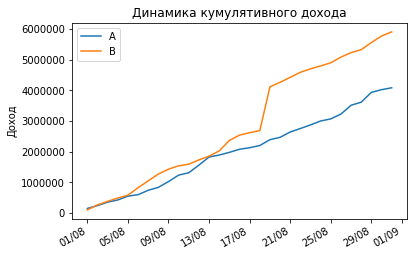

In [20]:
# Построение графика кумулятивного дохода по группам
fig, ax = plt.subplots()
line1 = data['revenueCummulativeA']
line2 = data['revenueCummulativeB']
warnings.filterwarnings("ignore")
ax.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime(), line1, '-', label='A')
ax.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime(), line2, '-', label='B')
# Create your formatter object and change the xaxis formatting.
date_fmt = '%d/%m'
formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)

plt.gcf().autofmt_xdate()
plt.title('Динамика кумулятивного дохода')
plt.ylabel('Доход')
ax.legend()
plt.show();

Соглано графику Динамики кумулятивного дохода доход, полученный по группе В, устойчиво превышает доход, полученный по группе А. 

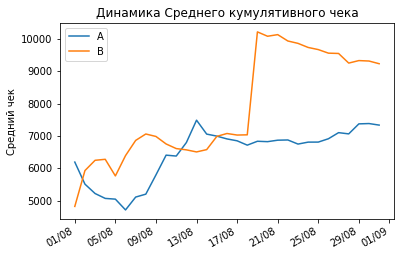

In [21]:
# Построим графики кумулятивного среднего чека по группам
fig, ax = plt.subplots()
line1 = data['revenueCummulativeA']/data['ordersCummulativeA']
line2 = data['revenueCummulativeB']/data['ordersCummulativeB']
ax.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime(), line1, '-', label='A')
ax.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime(), line2, '-', label='B')
# Create your formatter object and change the xaxis formatting.
date_fmt = '%d/%m'
formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)

plt.gcf().autofmt_xdate()
plt.title('Динамика Среднего кумулятивного чека')
plt.ylabel('Средний чек')
ax.legend()
plt.show()

Соглано графику Динамики Среднего кумулятивного чека, средний чек по группе В (стабилизируется у отметки 9 000 ед.) превышает средний чек по группе А (стабилизируется у отметки 7 000 ед.). 

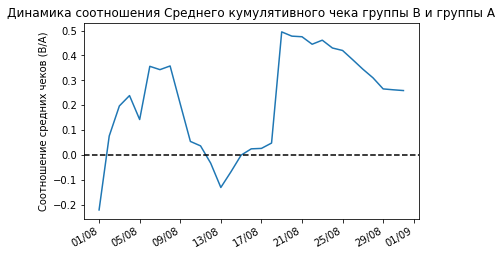

In [22]:
# cтроим отношение кумулятивных средних чеков
fig, ax = plt.subplots()
line1 = (data['revenueCummulativeB']/data['ordersCummulativeB']
            )/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1
ax.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime(), line1, '-')
date_fmt = '%d/%m'
formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.title('Динамика соотношения Среднего кумулятивного чека группы B и группы A')
plt.ylabel('Соотношение средних чеков (B/A)')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График соотношения Средних кумулятивных чеков демонстрирует стабилизацию превышения данных по группе В над данными группы А.

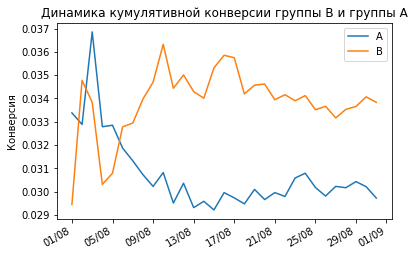

In [23]:
# Строим графики кумулятивной конверсии по группам
fig, ax = plt.subplots()
line1 = data['ordersCummulativeA'] / data['visitorsCummulativeA']
line2 = data['ordersCummulativeB'] / data['visitorsCummulativeB']
ax.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime(), line1, '-', label='A')
ax.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime(), line2, '-', label='B')
date_fmt = '%d/%m'
formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.title('Динамика кумулятивной конверсии группы B и группы A')
plt.ylabel('Конверсия')
ax.legend()
plt.show()


График Динамики кумулятивной конверсии групп демонстрирует стабилизацию превышения данных Группы В над данными группы А.

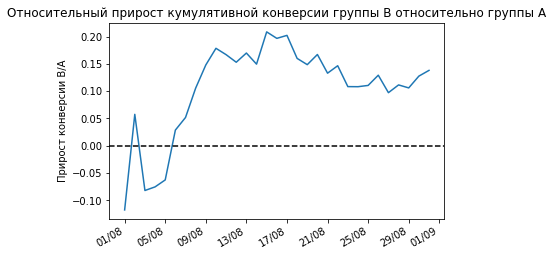

In [24]:
#  Построим график относительного прироста кумулятивной конверсии группы В относительно группы А
fig, ax = plt.subplots()
line1 = (data['ordersCummulativeB'] / data['visitorsCummulativeB']) / (data['ordersCummulativeA'] / data['visitorsCummulativeA'])-1
plt.plot_date(pd.to_datetime(data['date'], format='%Y-%m-%d').dt.to_pydatetime() , line1, '-')
date_fmt = '%d/%m'
formatter = dates.DateFormatter(date_fmt)
ax.xaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.title('Относительный прирост кумулятивной конверсии группы B относительно группы A')
plt.ylabel('Прирост конверсии В/А')
plt.axhline(y=0, color='black', linestyle='--')
plt.show();

График Относительного прироста кумулятивной конверсии группы В относительно группы А демонстрирует стабилизацию превышения данных Группы В над данными группы А на уровне 14%.

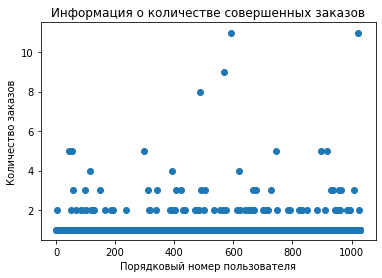

In [25]:
# Построим точечный график количества заказов
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Информация о количестве совершенных заказов')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов');

В основном пользователи совершили 1 заказ, реже 2, но были и те, кто совершил 11 заказов.

In [26]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

95% пользователей совершали не более 2 заказов, 99% - не более 4. Случаи совершения более 4 заказов будем считать аномальными.

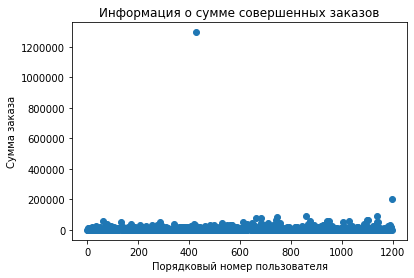

In [27]:
# Построим точечный график стоимостей заказов 
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('Информация о сумме совершенных заказов')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Сумма заказа');

В основном пользователи совершили заказы на сумму менее 100 000 ед., но были и заказы на сумму более 1 200 000 ед.

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

95% пользователей совершали заказы на сумму не более 28 000 ед., 99% - не более 58 233,2 ед. Случаи совершения заказов на сумму более 58 233,2 ед. будем считать аномальными.

In [29]:
# Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))


0.00840
0.138


P-value меньше 0,05. Значит имеется статистически значимое основание отвергнуть нулевую гипотезу о равенстве конверсий групп А и В. Конверсии групп различны, конверсия группы В превышает конверсию группы А на 13,8%.

In [30]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке групп есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A.

In [31]:
# Сформируем выборки без аномальных значений количества и стоимости заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


In [32]:
# Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.007
0.153


После очистки данных от аномальных значений P-value также меньше 0,05. Сохранилось статистически значимое основание отвергнуть нулевую гипотезу о равенстве конверсий групп А и В. Различие конверсии группы В и группы А увеличилось с 13,8% до 15,3%.

In [33]:
# Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
 
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


0.425
-0.006


После очистки данных от аномальных значений выводы в отношении среднего чека групп не изменились, статистически значимое различие не выявлено. При этом, средний чек группы B оказался незначительно ниже среднего чека группы A.

### Вывод по разделу 2

По результатам анализа данных с использованием графиков установлено, что:
- кумулятивный доход, полученный по группе В, устойчиво превышает доход, полученный по группе А;
- средний кумулятивный чек по группе В (стабилизируется у отметки 9 000 ед.) и превышает средний чек по группе А (стабилизируется у отметки 7 000 ед.) или на 25%;
- кумулятивная конверсии группы В превышает данные группы А, относительный прирост кумулятивной конверсии группы В относительно группы А составляет 14%;

Результаты анализа предоставленных данных эксперимента свидетельствуют о том, что:
- в основном пользователи совершили 1 заказ, реже 2, но были и те, кто совершил 11 заказов. При этом, 95% пользователей совершали не более 2 заказов, 99% - не более 4;
- в основном пользователи совершили заказы на сумму менее 100 000 ед., но были и заказы на сумму более 1 200 000 ед. При этом, 95% пользователей совершали заказы на сумму не более 28 000 ед., 99% - не более 58 233,2 ед. 

Учитывая изложенное, для очистки данных от выбросов считались аномальными:
- случаи совершения более 4 заказов;
- случаи совершения заказов на сумму более 58 233,2 ед.

По результатам расчета статистической значимости различий групп В и А установлено, что:
- по исходным данным:
    - конверсии групп различны, конверсия группы В превышает конверсию группы А на 13,8% с уровнем значимости 0.00840;
    - статистического подтверждения различий средних чеков групп не получено, уровень значимости составил 0,365. При этом, средний чек группы B выше среднего чека группы A на 25,9%;
- по очищенным данным:
    - конверсии групп также различны, при этом конверсия группы В превышает конверсию группы А на 15,3% с уровнем значимости 0.007;
    - статистического подтверждения различий средних чеков групп также не получено, уровень значимости составил 0,425. При этом, уже средний чек группы B ниже среднего чека группы A на 0,6%.

## Общий вывод
1. По результатам оценки 9 гипотез из Базы гипотез, содержащей оценки Охвата, Влияния, Уверенности в оценке и Трудозатрат для каждой гипотезы, с использованием методов ICE и RICE установлено:
    - согласно оценкам метода ICE приоритетными гипотезами являются:
        - Запустить акцию, дающую скидку на товар в день рождения;
        - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
        - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
    - согласно оценкам метода RICE приоритетными гипотезами являются:
        - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
        - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
        - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

Следует отметить, что при использовании методов ICE и RICE состав пяти наиболее приоритетных гипотез не изменился. При этом, использование дополнительно параметра Охвата в методе RICE привело к изменению ранга гипотез, за исключением гипотезы с индексом 6: Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

Кроме того, учитывая общие критерии, предъявляемые к формулировке гипотез, в целях однозначного понимания гипотез, получения более точных результатов при их проверке, представленные гипотезы требуют доработки в части формулировки, а также анализа на предмет содержания опережающих метрик, влияющих на показатель выручки.

2. В ходе анализа результатов А/В теста установлено следующее:
- Существует статистически значимое различие по конверсии между группами как по «сырым» данным, так и после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A.
- График различия среднего чека говорит о том, что результаты группы B лучше группы А, но это достигнуто за счет аномальных значений.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Согласно полученным результатам конверсия группы B лучше группы A.